In [1]:
### further to L1-1, this adds prediction using CNN

### This module uses Stacked LSTM 50 units and 100 epochs to predict Google
###  stock prices from Yahoo Finance
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
### import training set
dataset=pd.read_csv('GOOG.csv')
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,3/1/2012,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,4/1/2012,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,5/1/2012,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,6/1/2012,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,9/1/2012,16.102144,16.114599,15.472754,15.503389,15.503389,233776981


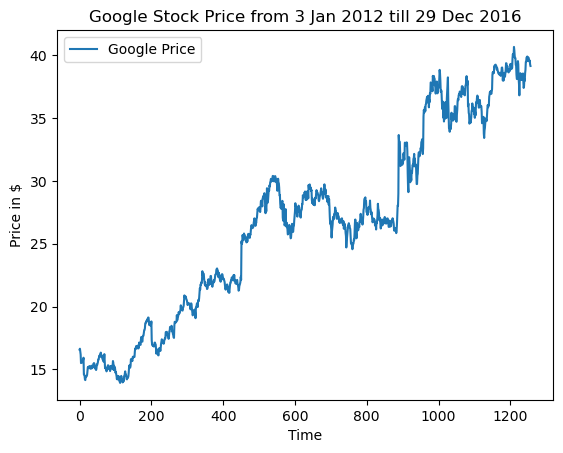

In [3]:
p=dataset.iloc[0:1259,5:6] ### reads in 'Adj Close'
plt.plot(p,label="Google Price",linestyle='-')
plt.title('Google Stock Price from 3 Jan 2012 till 29 Dec 2016')
plt.xlabel('Time')
plt.ylabel('Price in $')
plt.legend()
plt.show()

In [4]:
training_set=dataset.iloc[0:1100,5:6].values 
trgsset=pd.DataFrame(training_set)

test_set=dataset.iloc[1100:1259,5:6].values
tstset=pd.DataFrame(test_set)

print(dataset.shape, trgsset.shape, tstset.shape)
print(trgsset.head(),trgsset.tail(), tstset.head(),tstset.tail())

(1257, 7) (1100, 1) (157, 1)
           0
0  16.573130
1  16.644611
2  16.413727
3  16.189817
4  15.503389               0
1095  35.764500
1096  35.665501
1097  35.541500
1098  35.824501
1099  35.311501            0
0  35.331501
1  35.015999
2  35.487000
3  35.212002
4  36.004501              0
152  39.563000
153  39.495499
154  39.577499
155  39.252499
156  39.139500


In [5]:
### Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)
test_set_scaled=sc.transform(test_set)
type(training_set_scaled), type(test_set_scaled) 

(numpy.ndarray, numpy.ndarray)

In [6]:
print(len(training_set_scaled), training_set_scaled)

1100 [[0.10636301]
 [0.10923305]
 [0.09996281]
 ...
 [0.86796316]
 [0.87932595]
 [0.85872846]]


In [7]:
### creating data structure with 1040 cases, each with 60 time-steps and 1 output
X_train=[]
y_train=[]
for i in range(60,1100):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)   
X_train=np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1)) 
### This last step converts X_train to 3D from (1040,60) to (1040,60,1) 
###  for input to the keras app
print(X_train.shape, y_train.shape)

(1040, 60, 1) (1040,)


In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Prediction using RNN-LSTM

In [10]:
### Initializing RNN
model = Sequential()

In [11]:
### Add first LSTM layer and add Dropout Regularization

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))

### Sequential reads input as 3D. Add return_sequences=True for all LSTM layers except 
###  the last one. Setting this flag to True lets Keras know that LSTM output should 
###  be 3D. So, next LSTM layer can work further on the data. If this flag is false, then 
###  LSTM only returns last output (2D). Such output does not feed to another LSTM layer.

model.add(Dropout(0.2)) 
### This is a hyperparameter that prevents overfit by dropping 20% of nodal values

C:\Users\vista\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
### Add second LSTM layer and Dropout
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

In [13]:
### Add third LSTM layer and Dropout
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

In [14]:
### Add fourth LSTM layer and Dropout
model.add(LSTM(units=50)) 
### note: last LSTM layer does not carry argument 'return_sequences=True'
model.add(Dropout(0.2))

In [15]:
### Add output layer
model.add(Dense(units=1))  ### not capital "U"nit

In [16]:
### Compiling the RNN
model.compile(optimizer='adam',loss='mean_squared_error')

In [17]:
### Run the training set with the LSTM (specialized RNN here)
model.fit(X_train,y_train,epochs=100,batch_size=10)
### With 1040 cases (each 60 time inputs), there are 
###  1040/10 = 104 (mini) batches in each epoch 
###  Each mini batch has 10 cases

Epoch 1/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - loss: 0.0383
Epoch 2/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0060
Epoch 3/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0056
Epoch 4/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0059
Epoch 5/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0043
Epoch 6/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0043
Epoch 7/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0048
Epoch 8/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0043
Epoch 9/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0038
Epoch 10/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0034
Epoch 11/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0049
Epoch 12/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0039
Epoch 13/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0031
Epoch 14/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0030
Epoch 15/100
104/104 ━━━━━━━

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 213,155 (832.64 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,104 (555.10 KB)

In [19]:
predict_train=model.predict(X_train) 
print(predict_train.shape) 
### this output is (1040,60,1), we want only the first no. in each row of 1040 
### this 3D structure makes it more difficult to interpret comparison of prediction 
###  in training set vs output in trg set

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step
(1040, 1)


In [20]:
print(predict_train)

[[0.08865437]
 [0.08858573]
 [0.08465725]
 ...
 [0.86496216]
 [0.86246455]
 [0.87109554]]


In [21]:
predict_train=predict_train[:, 0]  
### select first column or first day of 60 days of each day prediction from 1 to 1040

In [22]:
print(predict_train)

[0.08865437 0.08858573 0.08465725 ... 0.86496216 0.86246455 0.87109554]


In [23]:
### creating data structure with 60 time-steps and 1 output
X_test=[]
y_test=[]  ### here y_test is to collect the predicted y values
for i in range(60,157):
    X_test.append(test_set_scaled[i-60:i, 0])
    y_test.append(test_set_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)  
### convert to np arrays as X_test is "list"    
X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [24]:
y_test.shape ### now (97.) is 1 Dim -- convert to two dim

(97,)

In [25]:
y_test = np.reshape(y_test, (-1, 1))
y_train=np.reshape(y_train,(-1,1))

In [26]:
### Prediction
predicted_stock_price=model.predict(X_test)
predicted_stock_price=predicted_stock_price[:,0]
#predicted_stock_price1=sc.inverse_transform(predicted_stock_price)
#predicted_stock_price.shape

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [27]:
print(predicted_stock_price)

[0.99358743 0.99260396 0.99256325 0.98630494 0.99051875 0.9880339
 0.984836   0.98045194 0.98028    0.97688216 0.97593737 0.97579336
 0.9788903  0.97431123 0.9707731  0.97310346 0.97678113 0.9882647
 0.98841226 0.981022   0.9602012  0.97299385 0.9620135  0.963475
 0.9765982  0.97222304 0.96643054 0.9745818  0.9819936  0.99676955
 0.9962831  0.97902876 0.9920227  0.9923719  0.9827592  0.98598635
 0.98055303 0.9853515  0.9857421  0.9857214  0.983222   0.99817055
 0.9946023  0.99792373 0.9880592  0.988614   0.9915921  1.0125358
 1.0205247  1.0133802  1.0175774  1.0381387  1.031039   1.0197821
 1.0170194  1.018765   1.0046289  1.0027825  0.9833245  0.97271514
 0.9719447  0.9990064  1.0081339  0.99800605 0.96712786 0.9551022
 0.93176126 0.9599925  0.96925557 0.974423   0.95841104 0.9694282
 0.9699713  0.95904285 0.95950395 0.96949965 0.9731216  0.95485324
 0.93987626 0.9437322  0.96129984 0.9558764  0.9706288  0.9788984
 0.9963722  0.9968413  1.0066824  1.0099595  1.012296   1.0044851
 1.01

In [28]:
from sklearn.metrics import mean_squared_error
import math
def print_error(trainY, testY, train_predict, test_predict):    
    ### Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    ### Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))
    
print_error(y_train, y_test, predict_train, predicted_stock_price)

Train RMSE: 0.021 RMSE
Test RMSE: 0.022 RMSE


In [29]:
print(y_train)

[[0.08936253]
 [0.08219231]
 [0.08787248]
 ...
 [0.86796316]
 [0.87932595]
 [0.85872846]]


In [30]:
print(predict_train)

[0.08865437 0.08858573 0.08465725 ... 0.86496216 0.86246455 0.87109554]


In [31]:
print(y_test)

[[1.01328988]
 [1.01172411]
 [1.00108392]
 [1.00664488]
 [1.00180672]
 [0.99763101]
 [0.99106623]
 [0.99092578]
 [0.98602727]
 [0.98556565]
 [0.98582664]
 [0.99106623]
 [0.98492312]
 [0.98082783]
 [0.98430082]
 [0.98968118]
 [1.00698628]
 [1.00752832]
 [0.99743021]
 [0.96599205]
 [0.98478267]
 [0.96605224]
 [0.97167335]
 [0.9902834 ]
 [0.98450161]
 [0.97811759]
 [0.98958068]
 [0.99923709]
 [1.02130006]
 [1.02067776]
 [0.99520183]
 [1.01286837]
 [1.00995734]
 [0.99680791]
 [1.00138505]
 [0.99188933]
 [0.9996586 ]
 [0.99973902]
 [1.00052184]
 [0.99694852]
 [1.0187505 ]
 [1.01298879]
 [1.01915193]
 [1.00319193]
 [1.00387442]
 [1.00674534]
 [1.03746086]
 [1.04998803]
 [1.04089373]
 [1.04571182]
 [1.07329564]
 [1.06237455]
 [1.04510959]
 [1.03764162]
 [1.03768173]
 [1.01593993]
 [1.01407287]
 [0.98414029]
 [0.97095059]
 [0.97072988]
 [1.01188459]
 [1.02792502]
 [1.01748567]
 [0.9718138 ]
 [0.95466937]
 [0.91865391]
 [0.96364314]
 [0.97566834]
 [0.9892194 ]
 [0.96775862]
 [0.98514399]
 [0.98

In [32]:
print(predicted_stock_price)

[0.99358743 0.99260396 0.99256325 0.98630494 0.99051875 0.9880339
 0.984836   0.98045194 0.98028    0.97688216 0.97593737 0.97579336
 0.9788903  0.97431123 0.9707731  0.97310346 0.97678113 0.9882647
 0.98841226 0.981022   0.9602012  0.97299385 0.9620135  0.963475
 0.9765982  0.97222304 0.96643054 0.9745818  0.9819936  0.99676955
 0.9962831  0.97902876 0.9920227  0.9923719  0.9827592  0.98598635
 0.98055303 0.9853515  0.9857421  0.9857214  0.983222   0.99817055
 0.9946023  0.99792373 0.9880592  0.988614   0.9915921  1.0125358
 1.0205247  1.0133802  1.0175774  1.0381387  1.031039   1.0197821
 1.0170194  1.018765   1.0046289  1.0027825  0.9833245  0.97271514
 0.9719447  0.9990064  1.0081339  0.99800605 0.96712786 0.9551022
 0.93176126 0.9599925  0.96925557 0.974423   0.95841104 0.9694282
 0.9699713  0.95904285 0.95950395 0.96949965 0.9731216  0.95485324
 0.93987626 0.9437322  0.96129984 0.9558764  0.9706288  0.9788984
 0.9963722  0.9968413  1.0066824  1.0099595  1.012296   1.0044851
 1.01

In [33]:
Pred_price=sc.inverse_transform(predicted_stock_price.reshape(-1, 1))
#Pred_price=Pred.price.reshape(-1, 1)

### Plotting the stock price prediction results from observation 60 to 157  or 12 Aug 2016 to 30 Dec 2016

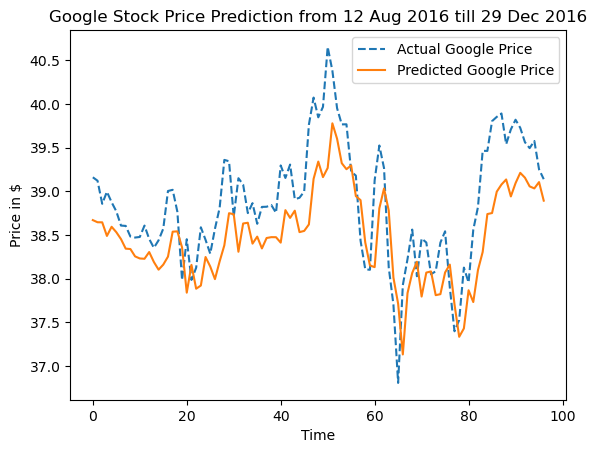

In [35]:
plt.plot(test_set[60:157,:],label="Actual Google Price",linestyle='--') 
plt.plot(Pred_price,label="Predicted Google Price",linestyle='-')
plt.title('Google Stock Price Prediction from 12 Aug 2016 till 29 Dec 2016')
plt.xlabel('Time')
plt.ylabel('Price in $')
plt.legend()
plt.show()

# Prediction using CNN

In [37]:
#Import librarues
from numpy import array
from tensorflow.keras import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

In [38]:
X_train.shape
## In CNN we require a 3D input

(1040, 60, 1)

In [39]:
# Define model architecture
model = Sequential()
model.add(Conv1D(filters=12,kernel_size=3,activation='relu',input_shape=(60,1),padding='valid'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

C:\Users\vista\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
# fit CNN model
history = model.fit(X_train,y_train,epochs=1000,batch_size=10,verbose=1)
print(history)

Epoch 1/1000
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0430
Epoch 2/1000
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0018   
Epoch 3/1000
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017
Epoch 4/1000
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022
Epoch 5/1000
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012   
Epoch 6/1000
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015
Epoch 7/1000
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014
Epoch 8/1000
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8146e-04
Epoch 9/1000
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9670e-04
Epoch 10/1000
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0787e-04
Epoch 11/1000
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3655e-04
Epoch 12/1000
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011  
Epoch 13/1000
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8703e-04
Epoch 14/1000
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0189e-

In [41]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 58, 12)              │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 29, 12)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 348)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          34,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,149 (410.74 KB)

 Trainable params: 35,049 (136.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 70,100 (273.83 KB)

In [42]:
CNN_y_train = model.predict(X_train, verbose=0)
print(CNN_y_train)

[[0.08787928]
 [0.08102182]
 [0.08562031]
 ...
 [0.85767883]
 [0.8520642 ]
 [0.8435601 ]]


In [43]:
# Testing the model
CNN_y_pred = model.predict(X_test, verbose=0)
print(CNN_y_pred)

[[1.0208956 ]
 [1.0069052 ]
 [1.0016748 ]
 [1.0052946 ]
 [1.0187153 ]
 [1.0002254 ]
 [0.9787963 ]
 [1.0031404 ]
 [0.98241025]
 [0.98478776]
 [0.9744666 ]
 [0.96159565]
 [0.9644167 ]
 [0.97606504]
 [0.9651222 ]
 [0.9454495 ]
 [0.9436655 ]
 [0.95339704]
 [0.9531    ]
 [0.9515887 ]
 [0.91923094]
 [0.8997234 ]
 [0.93498653]
 [0.90223867]
 [0.9193899 ]
 [0.94468856]
 [0.9489826 ]
 [0.931078  ]
 [0.9580814 ]
 [0.9791789 ]
 [0.9918552 ]
 [0.9980188 ]
 [0.9867329 ]
 [0.9982032 ]
 [0.98906344]
 [0.9862413 ]
 [0.9747784 ]
 [0.9601964 ]
 [0.9502737 ]
 [0.9639295 ]
 [0.9539272 ]
 [0.980892  ]
 [1.0035319 ]
 [1.0002447 ]
 [1.0041977 ]
 [0.9767906 ]
 [0.9749267 ]
 [1.003375  ]
 [1.0402873 ]
 [1.0279106 ]
 [1.0159756 ]
 [1.0504245 ]
 [1.0426008 ]
 [1.0272014 ]
 [1.0192479 ]
 [1.0305672 ]
 [1.0055127 ]
 [0.9700501 ]
 [0.94779015]
 [0.96369916]
 [0.96641946]
 [0.97803384]
 [1.0131433 ]
 [1.0004966 ]
 [0.95821124]
 [0.95115215]
 [0.9261399 ]
 [0.94331497]
 [0.9913527 ]
 [0.98494065]
 [0.9283528 ]
 [0.92

In [44]:
from sklearn.metrics import mean_squared_error
import math
def print_error(trainY, testY, train_predict, test_predict):    
    ### Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    ### Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))
    
print_error(y_train, y_test, CNN_y_train, CNN_y_pred)

Train RMSE: 0.011 RMSE
Test RMSE: 0.036 RMSE


In [45]:
len(y_test)

97

In [46]:
date_range_daily = pd.date_range(start='2016-08-16', end='2016-12-28', freq='B')
## 'B' business days, unlike 'D' which is calendar days
print(date_range_daily)
len(date_range_daily)

DatetimeIndex(['2016-08-16', '2016-08-17', '2016-08-18', '2016-08-19',
               '2016-08-22', '2016-08-23', '2016-08-24', '2016-08-25',
               '2016-08-26', '2016-08-29', '2016-08-30', '2016-08-31',
               '2016-09-01', '2016-09-02', '2016-09-05', '2016-09-06',
               '2016-09-07', '2016-09-08', '2016-09-09', '2016-09-12',
               '2016-09-13', '2016-09-14', '2016-09-15', '2016-09-16',
               '2016-09-19', '2016-09-20', '2016-09-21', '2016-09-22',
               '2016-09-23', '2016-09-26', '2016-09-27', '2016-09-28',
               '2016-09-29', '2016-09-30', '2016-10-03', '2016-10-04',
               '2016-10-05', '2016-10-06', '2016-10-07', '2016-10-10',
               '2016-10-11', '2016-10-12', '2016-10-13', '2016-10-14',
               '2016-10-17', '2016-10-18', '2016-10-19', '2016-10-20',
               '2016-10-21', '2016-10-24', '2016-10-25', '2016-10-26',
               '2016-10-27', '2016-10-28', '2016-10-31', '2016-11-01',
      

97

# Plotting the LSTM and CNN test data predictions vs. y-test

In [48]:
LSTM_y_pred1=np.asarray([predicted_stock_price])  
### converting 'predicted_stock_price' a stuple to numpy array
LSTM_y_pred=LSTM_y_pred1.T

In [49]:
y_test.shape,LSTM_y_pred.shape,CNN_y_pred.shape

((97, 1), (97, 1), (97, 1))

In [50]:
type(date_range_daily)

pandas.core.indexes.datetimes.DatetimeIndex

In [51]:
df1=pd.DataFrame(np.concatenate((y_test,LSTM_y_pred,CNN_y_pred),axis=1))

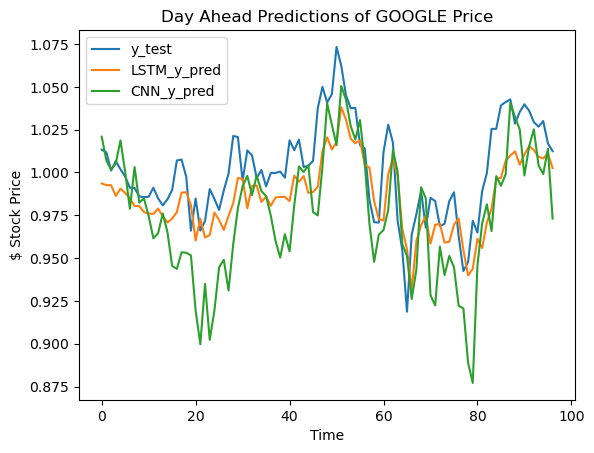

In [52]:
import matplotlib.pyplot as plt
plt.plot(y_test)
plt.plot(LSTM_y_pred)
plt.plot(CNN_y_pred)

plt.ylabel('$ Stock Price')
plt.xlabel('Time')
plt.title('Day Ahead Predictions of GOOGLE Price') 
plt.legend(['y_test','LSTM_y_pred','CNN_y_pred'])

plt.show()